# 1.7 Network graph visualization

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data

relationship_df = pd.read_csv('20th_century_relationship.csv', index_col = 0)

In [5]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,26
2,Austria,Germany,17
3,Austria,Hungary,6
4,Bulgaria,Hungary,6
...,...,...,...
74,Greece,Italy,2
75,Italy,Japan,6
76,Romania,Russia,6
77,India,Lebanon,2


In [7]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## Graph visualization - Networkx

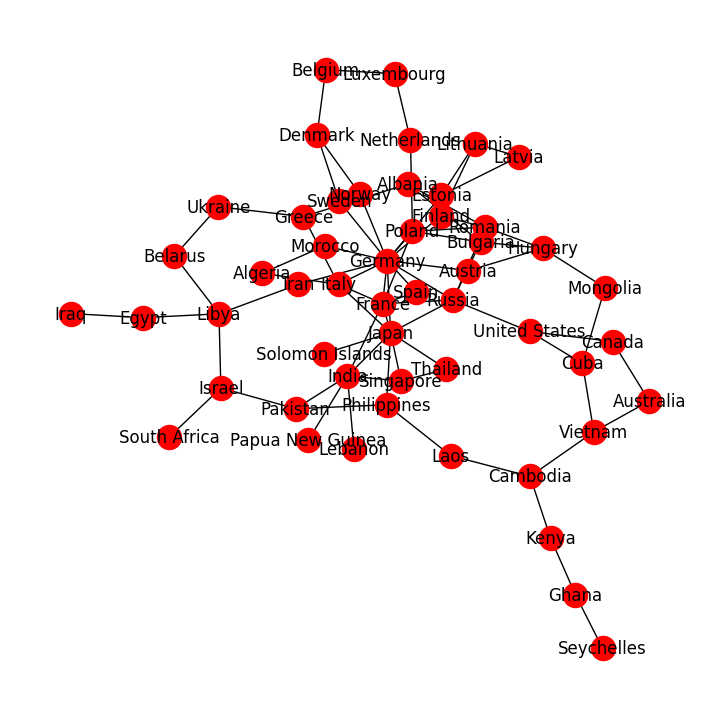

In [11]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [39]:
h.savefig('networkx_plt_20th_century.png')

## Graph visualization - Pyvis

In [43]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


### Community detection - Leiden algorithm

In [47]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [49]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [51]:
new_com = coms.to_node_community_map()

In [53]:
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Austria': [0],
             'Hungary': [0],
             'Bulgaria': [0],
             'Italy': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Albania': [0],
             'Greece': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Romania': [0],
             'Laos': [1],
             'Cambodia': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Seychelles': [1],
             'Mongolia': [1],
             'Cuba': [1],
             'United States': [1],
             'Canada': [1],
             'Australia': [1],
             'Vietnam': [1],
             'Japan': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Philippines': [2],
             'Solomon Islands': [2],
             'India': [2],
             'Pakistan': [2],
             'Papu

In [35]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [37]:
dict_com

{'Laos': 0,
 'Cambodia': 0,
 'Kenya': 0,
 'Ghana': 0,
 'Seychelles': 0,
 'Mongolia': 0,
 'Cuba': 0,
 'United States': 0,
 'Canada': 0,
 'Australia': 0,
 'Vietnam': 0,
 'Japan': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Papua New Guinea': 1,
 'Lebanon': 1,
 'Greece': 2,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Israel': 2,
 'South Africa': 2,
 'Iran': 2,
 'Russia': 3,
 'Austria': 3,
 'Hungary': 3,
 'Bulgaria': 3,
 'Poland': 3,
 'Albania': 3,
 'Romania': 3,
 'France': 4,
 'Germany': 4,
 'Italy': 4,
 'Spain': 4,
 'Morocco': 4,
 'Algeria': 4,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Belgium': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5,
 'Estonia': 6,
 'Latvia': 6,
 'Lithuania': 6,
 'Finland': 6}

In [55]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


# The Leiden algorithm works by exploring modularity. It tries to maximize the difference between the expected and actual number of edges in a community. These edges are created by the frequency of connections between the countries.
## From the image , the blue community represents the connections of the contries with Germany. Red community represents contries that are connected to Japan.
## Yellow community represents the countries that are connected to Russia. Pink represents the countries connected to France. 
## Purple and the green communities represents the contries with the minimal participation.

## Important Countries in 20th Century

In [59]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.13725490196078433,
 'Russia': 0.11764705882352941,
 'Germany': 0.2549019607843137,
 'Austria': 0.0392156862745098,
 'Hungary': 0.0784313725490196,
 'Bulgaria': 0.0784313725490196,
 'Italy': 0.09803921568627451,
 'Spain': 0.0392156862745098,
 'Poland': 0.09803921568627451,
 'Estonia': 0.058823529411764705,
 'Latvia': 0.0392156862745098,
 'Lithuania': 0.058823529411764705,
 'Finland': 0.058823529411764705,
 'Netherlands': 0.0392156862745098,
 'Luxembourg': 0.0392156862745098,
 'Belgium': 0.0392156862745098,
 'Denmark': 0.058823529411764705,
 'Norway': 0.0392156862745098,
 'Sweden': 0.0392156862745098,
 'Albania': 0.058823529411764705,
 'Greece': 0.058823529411764705,
 'Ukraine': 0.0392156862745098,
 'Belarus': 0.0392156862745098,
 'Libya': 0.0784313725490196,
 'Egypt': 0.0392156862745098,
 'Iraq': 0.0196078431372549,
 'Japan': 0.1764705882352941,
 'Morocco': 0.0392156862745098,
 'Algeria': 0.0392156862745098,
 'Thailand': 0.0392156862745098,
 'Singapore': 0.05882352941176470

In [63]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [65]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

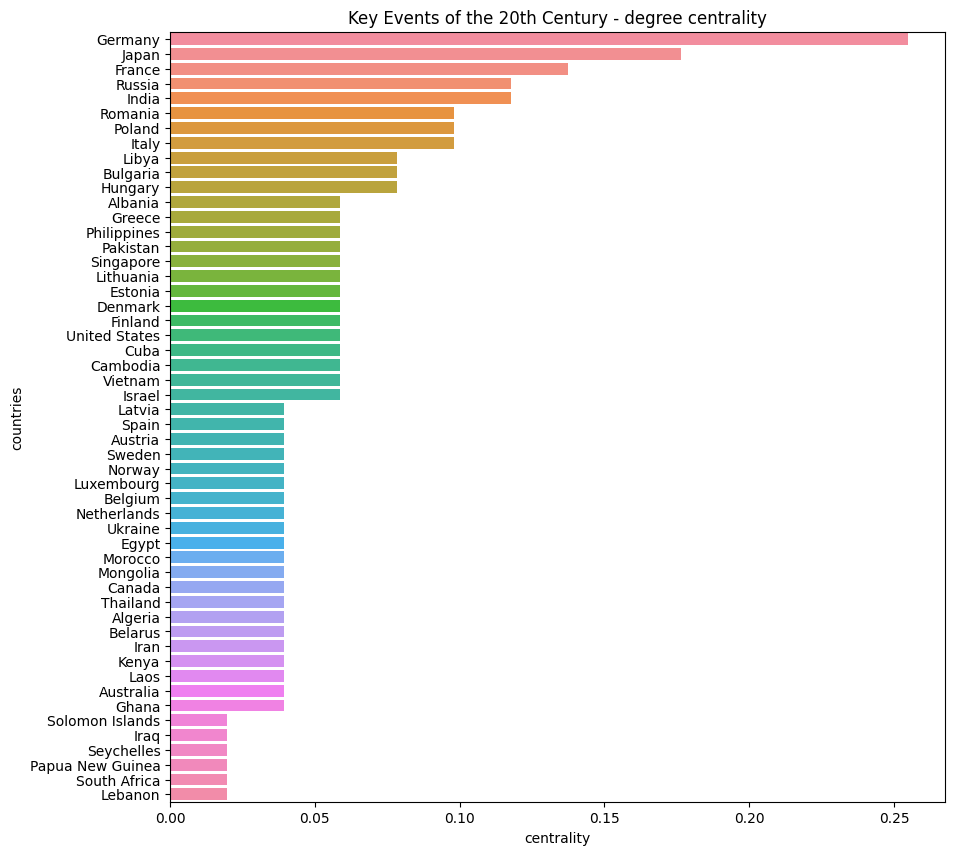

In [69]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Key Events of the 20th Century - degree centrality")

## Interpretation of dregree of Centrality
### From the bar chart we can clearly see that the Germany is the country with the highest degree of centrality.
### That means Germany has the major connections with other countries. From the key events of the 20th century, most of the european countries were effefcted.
### During the war, Germens were special reponsible for transforming a regional conflict into a great war as a result of the geographical position at the centre of the continent.
### Because Germany is located in the centre of Europe, most of the countries are conmnected with germany, followed by France.

In [73]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [75]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

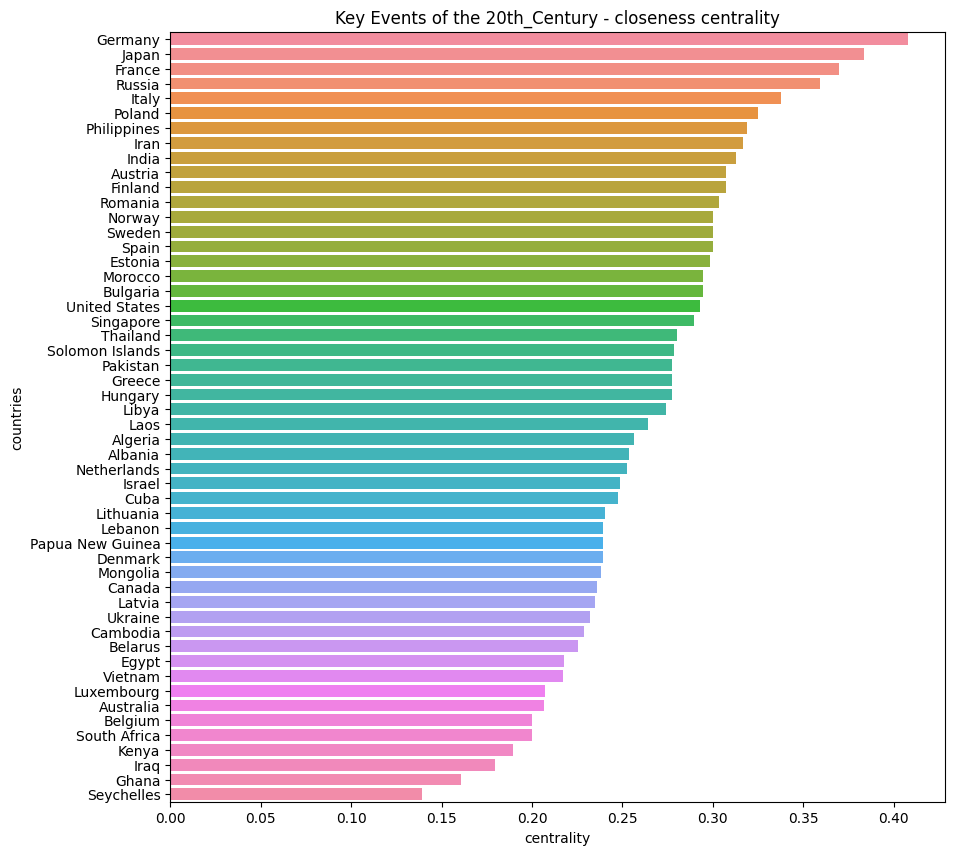

In [83]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Key Events of the 20th_Century - closeness centrality")

## Interpretation of closeness Centrality:
### The result of degree of closeness doesnot show much difference regarding the order of closeness.
### All the countries occupies the top rank next to Germany and Japan showing their participation in the key events of the 20th century.

In [85]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [87]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

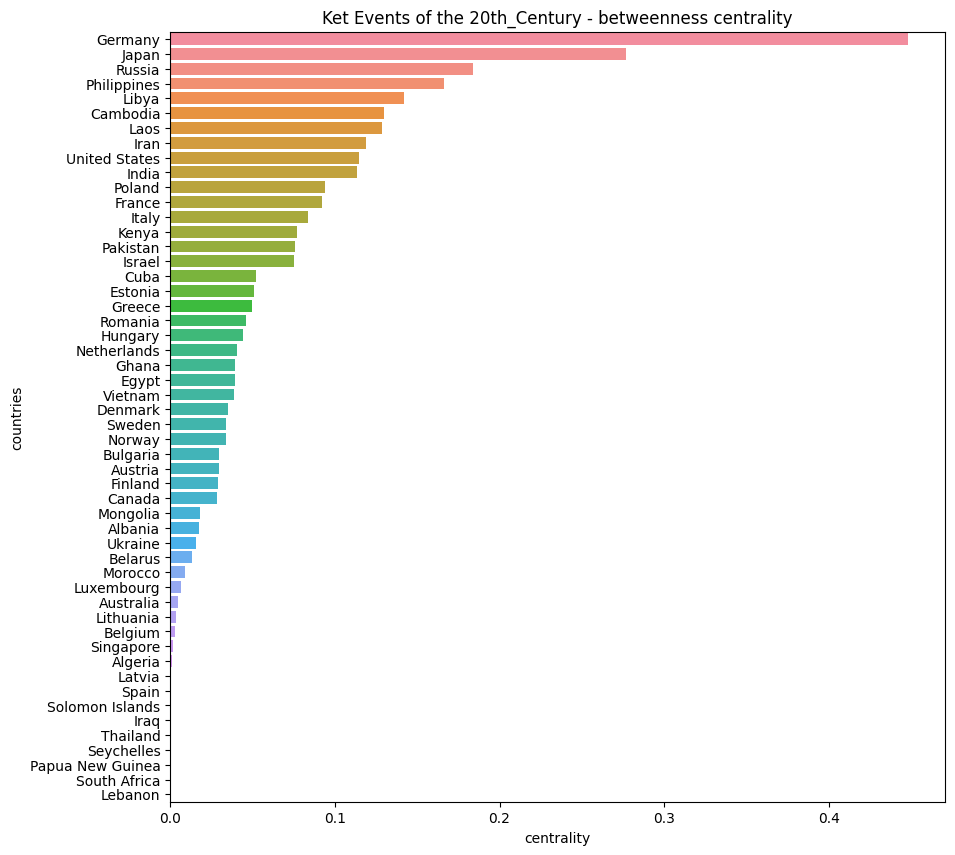

In [91]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Ket Events of the 20th_Century - betweenness centrality")

## Interpretation of Betweenness Centrality
### The betweenness centrality shows the Germany has the most number of connections and plays a major role in connecting with other countries followed by Japan.

In [93]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [10]:
## END